In [1]:
import cfe

[2025年01月28日 12时04分26秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

绘制聚类结果

AnnData object with n_obs × n_vars = 926 × 1128
    obs: 'c', 'milestone_color', 'edge_color', 'milestone'
    var: 'feature_id', 'housekeeping'
    uns: 'cfe', 'milestone_colors', 'edge_color_colors', 'milestone_color_colors'
    obsm: 'milestone_network_emb'
    layers: 'expression', 'counts'

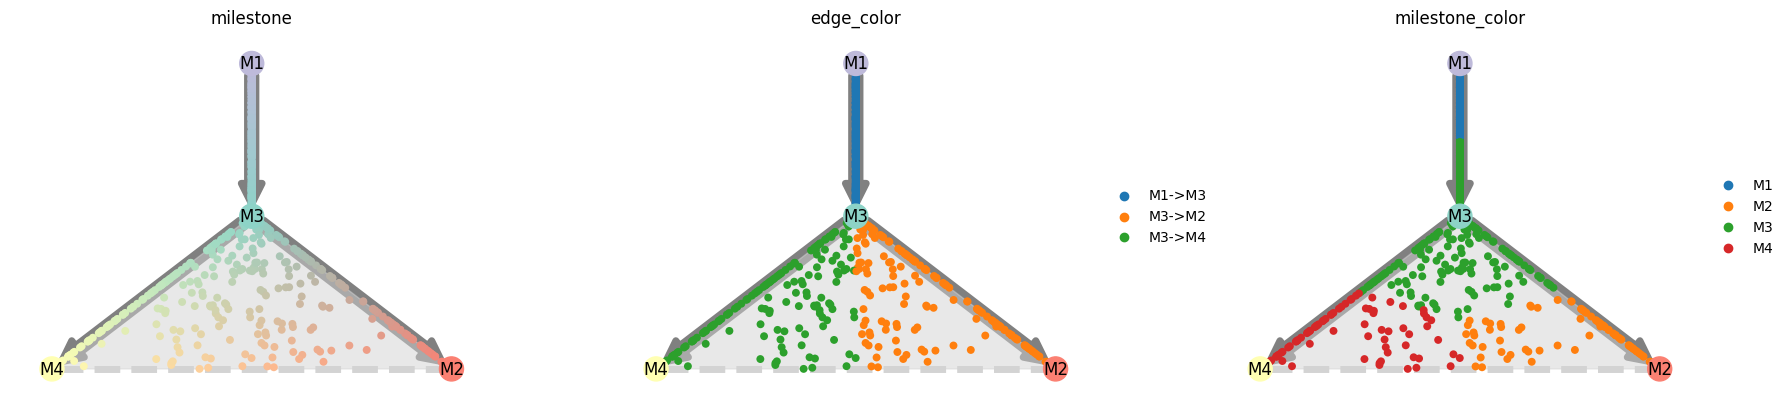

In [2]:
fadata = cfe.data.FateAnnData.read_dynverse_simulation_data()

fadata.group_onto_nearest_milestones(cluster_key="milestone_color") # new cluster color
fadata.group_onto_trajectory_edges(cluster_key="edge_color") # new cluster color

cfe.plot.plot_graph(fadata, color=["milestone", "edge_color", "milestone_color"])
fadata

In [3]:
fadata.obs

,c,milestone_color,edge_color,milestone
C1,C1,M3,M3->M4,C1
C2,C2,M3,M3->M2,C2
C3,C3,M3,M3->M4,C3
C4,C4,M2,M3->M2,C4
C5,C5,M3,M1->M3,C5
...,...,...,...,...
C926,C926,M1,M1->M3,C926
C927,C927,M4,M3->M4,C927
C928,C928,M3,M3->M2,C928
C929,C929,M3,M1->M3,C929


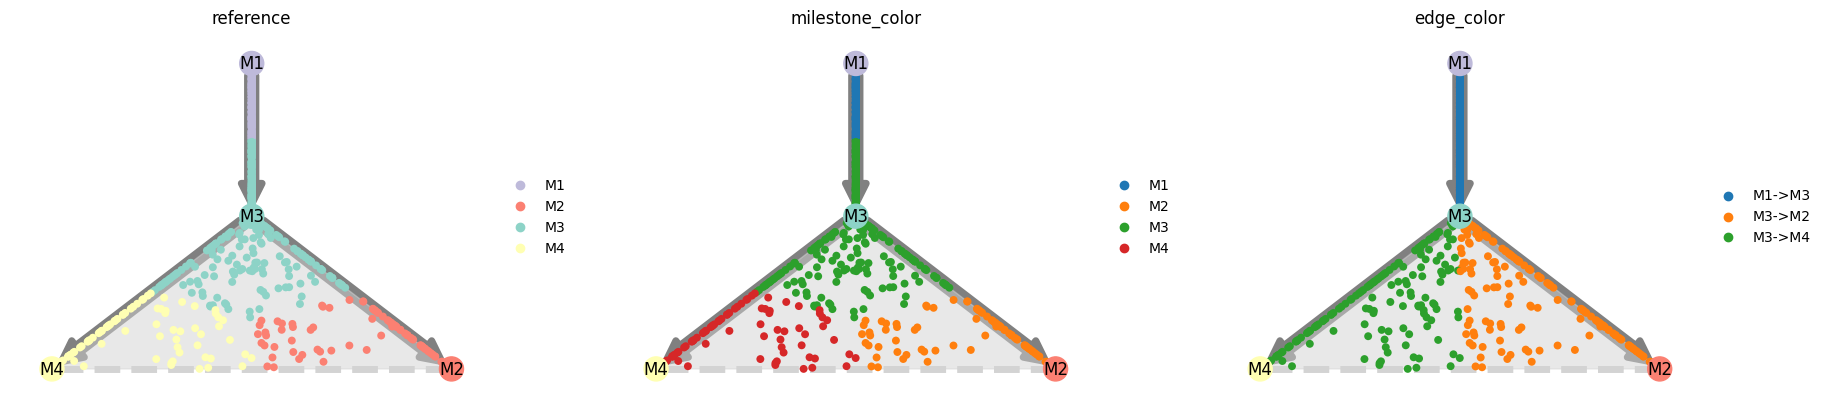

In [4]:

# 换个颜色作为reference参考
fadata.obs["reference"] = fadata.obs["milestone_color"].astype("category")

# 尝试与milestone颜色匹配
# import seaborn as sns
# fadata.uns["reference_colors"] = sns.palettes.color_palette((cfe.settings.sns_palette), fadata.obs["reference"].unique().shape[0])
 # 手动设置颜色
fadata.uns["reference_colors"] = ["#bebada", "#fb8072","#8dd3c7", "#ffffb3"]

cfe.plot.plot_graph(fadata, color=["reference", "milestone_color", "edge_color"])

指标对比